In [1]:
import os

from matplotlib import pylab as plt
import cv2
import numpy as np
import sys
# 导包
print("导包结束！")

导包结束！


C:\Users\MAC\PycharmProjects\ComputerVisionPractice\计算机视觉-练习1


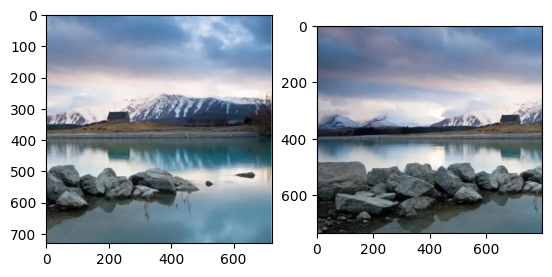

In [13]:
# 读取输入图片
print(os.getcwd())
ima = cv2.imread(r"./image/imagB.png")
imb = cv2.imread(r"./image/imagA.png")
A = ima.copy()
B = imb.copy()
imageA = cv2.resize(A, (0, 0), fx=0.2, fy=0.2)
imageB = cv2.resize(B, (0, 0), fx=0.2, fy=0.2)
plt.subplot(1, 2, 1)
plt.imshow(ima[:,:,::-1])
plt.subplot(1, 2, 2)
plt.imshow(imb[:,:,::-1])
plt.show()

In [4]:
# 检测A、B图片的SIFT关键特征点，并计算特征描述子
def detectAndDescribe(image):
    # 建立SIFT生成器
    sift = cv2.SIFT_create()
    # 检测SIFT特征点，并计算描述子
    (kps, features) = sift.detectAndCompute(image, None)
    # 将结果转换成NumPy数组
    kps = np.float32([kp.pt for kp in kps])
    # 返回特征点集，及对应的描述特征
    return (kps, features)

In [6]:
# 检测A、B图片的SIFT关键特征点，并计算特征描述子
kpsA, featuresA = detectAndDescribe(imageA)
kpsB, featuresB = detectAndDescribe(imageB)
# 建立暴力匹配器
bf = cv2.BFMatcher()
# 使用KNN检测来自A、B图的SIFT特征匹配对，K=2
matches = bf.knnMatch(featuresA, featuresB, 2)

In [8]:
good = []
for m in matches:
    # 当最近距离跟次近距离的比值小于ratio值时，保留此匹配对
    if len(m) == 2 and m[0].distance < m[1].distance * 0.75:
        # 存储两个点在featuresA, featuresB中的索引值
        good.append((m[0].trainIdx, m[0].queryIdx))

In [15]:
# 当筛选后的匹配对大于4时，计算视角变换矩阵
if len(good) > 4:
    # 获取匹配对的点坐标
    ptsA = np.float32([kpsA[i] for (_, i) in good])
    ptsB = np.float32([kpsB[i] for (i, _) in good])
    # 计算视角变换矩阵
    H, status = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, 4.0)

# 匹配两张图片的所有特征点，返回匹配结果
M = (matches, H, status)
# 如果返回结果为空，没有匹配成功的特征点，退出程序
if M is None:
    print("无匹配结果")
    sys.exit()


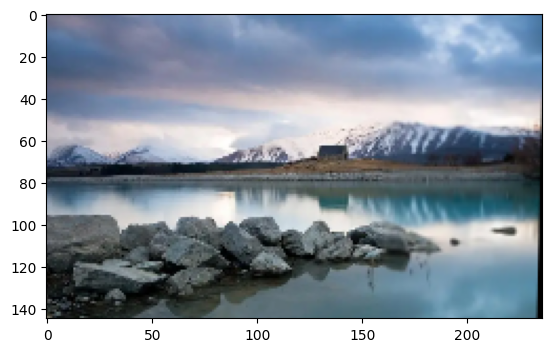

(145, 236, 3)


In [16]:
# 否则，提取匹配结果
# H是3x3视角变换矩阵
(matches, H, status) = M
# 将图片A进行视角变换，result是变换后图片
result = cv2.warpPerspective(imageA, H, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
# 将图片B传入result图片最左端
result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB
#('res', result)
# 去除平移后的 黑图
area = np.where(result > 0)
result = result[min(area[0]):max(area[0]), min(area[1]):max(area[1]), :]
result = result[:, :, ::-1]
plt.imshow(result)
plt.show()
print(result.shape)
